# PREPROCESSING AND MODELING PROCESS

In [1]:
import pandas as pd
import json
import ast
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data_aux = pd.read_csv("full_data.csv")
df_data_aux.shape

(44228, 47)

In [3]:
df_data_aux

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,main_team_rk,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed
0,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,A,Reims,...,1.0,5.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
1,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,H,Amiens SC,...,5.0,1.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
2,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,A,Monaco,...,2.0,5.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
3,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,H,Bordeaux,...,5.0,2.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
4,10330211,Ligue 1,18-19,12935,3.0,2018-08-26 13:00:00,1,7,A,Guingamp,...,5.0,2.0,"[{'id': 690, 'sport_id': 1, 'country_id': 17, ...","[{'id': 3787449, 'fixture_id': 10330211, 'type...","[{'id': 32407050, 'fixture_id': 10330211, 'per...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44223,19167985,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Reggiana,...,14.0,2.0,"[{'id': 2892, 'sport_id': 1, 'country_id': 251...","[{'id': 356436184, 'fixture_id': 19167985, 'ty...","[{'id': 149684317, 'fixture_id': 19167985, 'pe...",76.0,16.48,56.0,17.12,2.55
44224,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,A,Südtirol,...,12.0,15.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44225,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Salernitana,...,15.0,12.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44226,19167987,Serie B,24-25,23839,33.0,2025-04-12 15:15:00,9,6,A,Cittadella,...,12.0,14.0,"[{'id': 8485, 'sport_id': 1, 'country_id': 251...","[{'id': 356956919, 'fixture_id': 19167987, 'ty...","[{'id': 149693032, 'fixture_id': 19167987, 'pe...",47.0,18.89,68.0,19.95,5.58


In [4]:
df_stats = pd.read_csv("df_all_data_statistics.csv")
df_stats

,fixture_id,local_red_cards,away_red_cards,local_yellow_cards,away_yellow_cards,local_goals,away_goals,local_possession,away_possession,local_corners,away_corners,goals_diff
0,10329241,0.0,0.0,1.0,1.0,1.0,0.0,50.000000,50.000000,3.000000,4.000000,1.0
1,10329239,1.0,1.0,2.0,5.0,0.0,1.0,52.000000,48.000000,3.000000,2.000000,-1.0
2,10329242,0.0,0.0,1.0,3.0,3.0,1.0,50.000000,50.000000,5.000000,1.000000,2.0
3,10329243,0.0,0.0,0.0,1.0,0.0,0.0,55.000000,45.000000,7.000000,1.000000,0.0
4,10329240,0.0,0.0,2.0,1.0,1.0,3.0,61.000000,39.000000,4.000000,5.000000,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33212,19129777,0.0,0.0,0.0,0.0,0.0,0.0,48.333333,38.500000,4.933333,3.875000,0.0
33213,19145090,0.0,0.0,0.0,0.0,0.0,0.0,56.578947,45.315789,6.736842,4.263158,0.0
33214,19135032,0.0,0.0,0.0,0.0,0.0,0.0,52.722222,56.833333,4.888889,7.000000,0.0
33215,19135034,0.0,0.0,0.0,0.0,0.0,0.0,43.166667,46.777778,4.833333,3.611111,0.0


In [10]:
df_stats["local_possession"] = df_stats["local_possession"].fillna(0).astype(float)
df_stats["away_possession"] = df_stats["away_possession"].fillna(0).astype(float) 
df_stats["possession_diff"] = df_stats["local_possession"] - df_stats["away_possession"]
df_stats.head()

,fixture_id,local_red_cards,away_red_cards,local_yellow_cards,away_yellow_cards,local_goals,away_goals,local_possession,away_possession,local_corners,away_corners,goals_diff,possession_diff
0,10329241,0.0,0.0,1.0,1.0,1.0,0.0,50.0,50.0,3.0,4.0,1.0,0.0
1,10329239,1.0,1.0,2.0,5.0,0.0,1.0,52.0,48.0,3.0,2.0,-1.0,4.0
2,10329242,0.0,0.0,1.0,3.0,3.0,1.0,50.0,50.0,5.0,1.0,2.0,0.0
3,10329243,0.0,0.0,0.0,1.0,0.0,0.0,55.0,45.0,7.0,1.0,0.0,10.0
4,10329240,0.0,0.0,2.0,1.0,1.0,3.0,61.0,39.0,4.0,5.0,-2.0,22.0


## WE JUST GET THE HOME VS AWAY DATA AND REMOVE DUPLICATES

In [6]:
# df_data_aux = df_data_aux[df_data_aux["side"]=="H"]
# df_data_aux.shape

In [11]:
# Merge the dataframes
df_data = pd.merge(df_data_aux, df_stats[['fixture_id', 'possession_diff']], on=['fixture_id'], how='left')

# Adjust red_cards_diff based on the "side" column
df_data['possession_diff'] = df_data.apply(
    lambda row: row['possession_diff'] if row['side'] == 'H' else -row['possession_diff'], axis=1)

df_data.head()

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed,possession_diff
0,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,A,Reims,...,5.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN,-14.0
1,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,H,Amiens SC,...,1.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN,14.0
2,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,A,Monaco,...,5.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN,10.0
3,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,H,Bordeaux,...,2.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN,-10.0
4,10330211,Ligue 1,18-19,12935,3.0,2018-08-26 13:00:00,1,7,A,Guingamp,...,2.0,"[{'id': 690, 'sport_id': 1, 'country_id': 17, ...","[{'id': 3787449, 'fixture_id': 10330211, 'type...","[{'id': 32407050, 'fixture_id': 10330211, 'per...",NaN,NaN,NaN,NaN,NaN,4.0


In [20]:
# df_data[df_data["main_team"] == "FC Barcelona"][['fixture_id',"main_team_acc_possession","rival_team_acc_possession","possession_diff"]].head()

In [21]:
#Create a column which is the main_team_formation concatenated with "_" and the rival_team_formation
df_data["combined_formation"] = df_data["main_team_formation"] + "/" + df_data["rival_team_formation"]
print(df_data["combined_formation"].value_counts())
print(len(df_data["combined_formation"].unique()))

combined_formation
4-2-3-1/4-2-3-1    4524
4-3-3/4-3-3        2370
4-3-3/4-2-3-1      2324
4-2-3-1/4-3-3      2324
4-2-3-1/4-4-2      1951
4-4-2/4-2-3-1      1951
4-4-2/4-4-2        1640
3-5-2/3-5-2        1608
4-2-3-1/3-5-2      1529
3-5-2/4-2-3-1      1529
3-4-3/4-2-3-1      1442
4-2-3-1/3-4-3      1442
4-3-3/3-5-2        1441
3-5-2/4-3-3        1441
4-4-2/4-3-3        1324
4-3-3/4-4-2        1324
5-4-1/4-2-3-1      1243
4-2-3-1/5-4-1      1243
3-4-3/3-4-3        1176
3-5-2/3-4-3        1001
3-4-3/3-5-2        1001
3-4-3/4-3-3         862
4-3-3/3-4-3         862
4-4-2/3-5-2         745
3-5-2/4-4-2         745
4-4-2/3-4-3         630
3-4-3/4-4-2         630
5-4-1/4-4-2         617
4-4-2/5-4-1         617
5-4-1/4-3-3         492
4-3-3/5-4-1         492
3-4-3/5-4-1         407
5-4-1/3-4-3         407
5-4-1/5-4-1         310
5-4-1/3-5-2         292
3-5-2/5-4-1         292
Name: count, dtype: int64
36


### Previous Mean Matrix

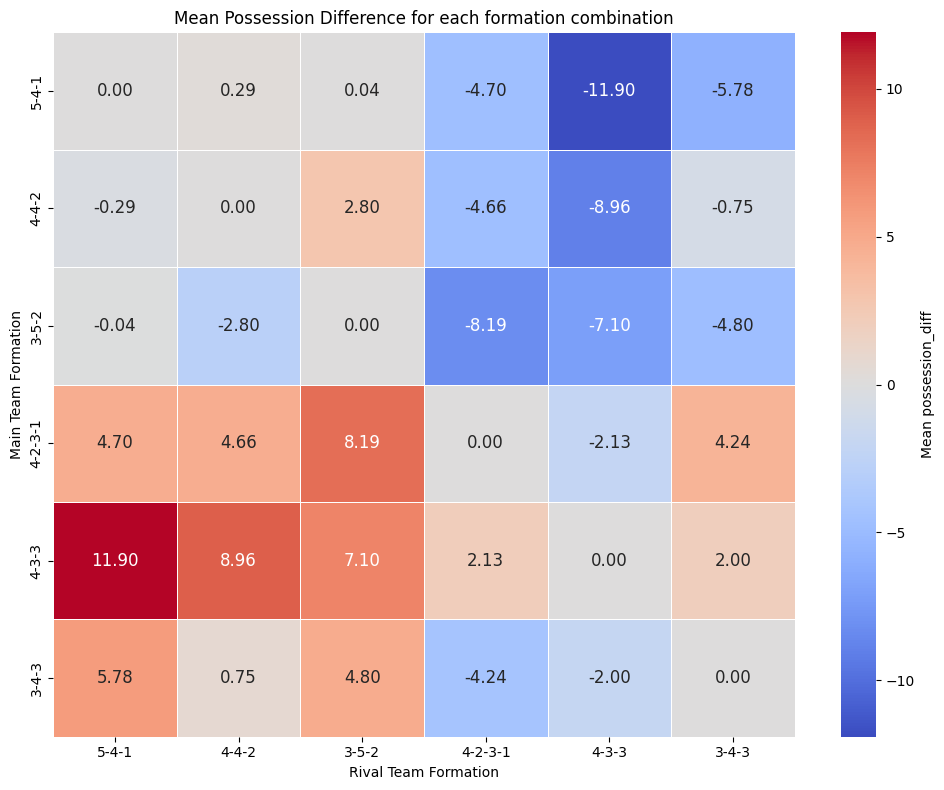

In [44]:

# Create a matrix with the mean of "goals_diff" for each combination of main_team_formation and rival_team_formation
sorted_formations = ["5-4-1","4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 

mean_goals_diff_matrix = df_data.pivot_table(
    index="main_team_formation",
    columns="rival_team_formation",
    values="possession_diff",
    aggfunc="mean"
).reindex(index=sorted_formations, columns=sorted_formations)

mean_goals_diff_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(mean_goals_diff_matrix, annot=True, fmt=".2f", linewidths=.6, cmap="coolwarm", cbar_kws={'label': 'Mean possession_diff'}, annot_kws={"size": 12})

plt.title("Mean Possession Difference for each formation combination")
plt.ylabel("Main Team Formation")
plt.xlabel("Rival Team Formation")
plt.tight_layout()
plt.show()


In [22]:

D_col = "combined_formation"
 

#WE USE THE FOLLOWING VARIABLES TO ADDRESS IN A MORE GENERIC WAY (DO NOT CONSIDER EXACT PROFILES SUCH AS BARÇA'S POSSESSION+CORNERS+GOALS...) 
X_values_list = [
    # 'League', 'season', 'main_team', 'rival_team', 
    'season_id','round',
    'day_of_week', 'side', 
      #  'rival_team_formation',
       'main_team_acc_pointsL','main_team_acc_pointsA','rival_team_acc_pointsL', 
       'rival_team_acc_pointsA','main_team_plays_CL', 'rival_team_plays_CL',
       'main_team_rk', 'rival_team_rk','clouds', 'feels_like', 'humidity', 'temperature','wind_speed',
       "combined_formation" #Then it will be removed from the list of features
       , "month" #We leave month just for the knn imputer in the weather.
       ]

# y = "winner" 
target1 = "possession_diff" #We will use this as a target for the regression model

## Split train-test

In [23]:
from sklearn.model_selection import train_test_split

# Split data before applying transformations
# Ensure unique fixture_id is either in train or test
unique_fixtures = df_data["fixture_id"].unique()
train_fixtures, test_fixtures = train_test_split(unique_fixtures, test_size=0.2, random_state=42)

# Filter the data based on the split fixture_id
X_train_aux = df_data[df_data["fixture_id"].isin(train_fixtures)][X_values_list]
X_test_aux = df_data[df_data["fixture_id"].isin(test_fixtures)][X_values_list]
y_train = df_data[df_data["fixture_id"].isin(train_fixtures)][target1]
y_test = df_data[df_data["fixture_id"].isin(test_fixtures)][target1]

D_train = X_train_aux[D_col]
D_test = X_test_aux[D_col]
#comvert D_train to a pd.dataframe with the column "original":
D_train = pd.DataFrame(D_train)
D_train.columns = ["original"]
D_test = pd.DataFrame(D_test)
D_test.columns = ["original"]

X_train = X_train_aux.drop(columns=[D_col])
X_test = X_test_aux.drop(columns=[D_col])

## Missing Data Treatment

In [24]:
from sklearn.impute import KNNImputer

# Apply KNN imputation only to X_train
def impute_weather_with_knn(X_train, X_test):
    features = ['clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed', 'month', 'season_id']
    
    imputer = KNNImputer(n_neighbors=min(10, len(X_train)))

    # Fit only on X_train and transform both sets
    X_train[features] = imputer.fit_transform(X_train[features])  # Learn from train
    X_test[features] = imputer.transform(X_test[features])        # Apply to test

    return X_train, X_test

# Impute missing values
# X1_train_aux, X1_test_aux = impute_weather_with_knn(X_train.copy(), X_test.copy())
X_train, X_test = impute_weather_with_knn(X_train.copy(), X_test.copy())

## Data Encoding 

In [25]:
side_mapping = {"H": 1, "A": 0}

X_train["side"] = X_train["side"].map(side_mapping)
X_test["side"] = X_test["side"].map(side_mapping)

In [26]:
#We use One-Hot Encoding for "season_id" and "day_of_week":
X_train = pd.get_dummies(X_train, columns=["season_id","day_of_week"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["season_id","day_of_week"], drop_first=True)

##### We drop the non-encoded variables and other no-longer needed variables:

In [27]:
X_train.drop(['month'], axis = 1, inplace = True)
X_test.drop(['month'], axis = 1, inplace = True)

## Standarize Data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_cols = X_train.columns
X_train = scaler.fit_transform(X_train)  # Standardizes the entire dataframe
X_train = pd.DataFrame(X_train, columns=X1_cols)

# 2. Scale X_test using the SAME scaler
X1_test_cols = X_test.columns
X1_test_scaled = scaler.transform(X_test)  # Transform on X_test (no fit)
X_test = pd.DataFrame(X1_test_scaled, columns=X1_test_cols)

# Modeling

## 1st Model: red_cards_diff ~ Confounders

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score


# Define models and parameter grids
models1 = {
    "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False],"copy_X": [True, False],"positive": [True, False]}),
    
    # "SVR": (SVR(), {"C": uniform(0.1, 100),"epsilon": uniform(0.01, 1),"kernel": ["linear", "rbf", "poly"],}),
    
    # "RandomForest": (RandomForestRegressor(), {"n_estimators": randint(50, 500),"max_depth": randint(2, 20),
    #                                            "min_samples_split": randint(2, 10),"min_samples_leaf": randint(1, 10),}),   #30 min
    
    "XGBoost": (XGBRegressor(), {"n_estimators": randint(50, 400),"learning_rate": uniform(0.01, 0.3),"max_depth": randint(2, 5),
                                 "subsample": uniform(0.5, 0.5),"colsample_bytree": uniform(0.5, 0.5),
    }),
    
    # "LightGBM": (LGBMRegressor(), {"n_estimators": randint(50, 500),"learning_rate": uniform(0.01, 0.3),
    #                                "num_leaves": randint(10, 100),"max_depth": randint(2, 20),"subsample": uniform(0.5, 0.5),})  too mutch overfitting
}

# Run RandomizedSearchCV for each model
best_models1 = {}
results1 = []
list_residuals1_train = {}
list_residuals1_test = {}

for name, (model, param_grid) in tqdm(models1.items()):
    print(f"🔍 Tuning {name}...")
    
    search = RandomizedSearchCV(model, param_distributions=param_grid,n_iter=20, cv=5, 
                                scoring="neg_mean_squared_error",n_jobs=-1, random_state=42)
    
    # search = BayesSearchCV(model,param_grid,n_iter=30, scoring='neg_mean_squared_error',cv=5,n_jobs=-1,random_state=42)
    
    search.fit(X_train, y_train)
    
    best_models1[name] = search.best_estimator_
    
    y_train_pred = search.best_estimator_.predict(X_train)
    # Evaluate on test set
    y_test_pred = search.best_estimator_.predict(X_test)
    
    list_residuals1_train[name] = y_train - y_train_pred
    list_residuals1_test[name] = y_test - y_test_pred
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
    
    results1.append({"Model": name, "Best Params": search.best_params_, "Train MSE": train_mse, "Test MSE": test_mse,
        "Train R2": train_r2, "Test R2": test_r2, "Residuals Train":list_residuals1_train[name],"Residuals_test":list_residuals1_test[name]})
    
    print(f"✅ {name} Best MSE: {test_mse:.4f}")

# Convert results to DataFrame for better visualization
results_df1 = pd.DataFrame(results1)
results_df1.head()


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🔍 Tuning LinearRegression...


 50%|█████     | 1/2 [00:09<00:09,  9.43s/it]

Training MSE: 366.9377, Training R²: 0.2330
Test MSE: 373.3008, Test R²: 0.2373
✅ LinearRegression Best MSE: 373.3008
🔍 Tuning XGBoost...


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

Training MSE: 330.7077, Training R²: 0.3087
Test MSE: 343.3542, Test R²: 0.2985
✅ XGBoost Best MSE: 343.3542


,Model,Best Params,Train MSE,Test MSE,Train R2,Test R2,Residuals Train,Residuals_test
0,LinearRegression,"{'positive': True, 'fit_intercept': False, 'co...",366.937695,373.300765,0.233003,0.237309,0 -25.477569 1 41.788657 2 ...,6 26.103032 7 -15.334530 12 ...
1,XGBoost,"{'colsample_bytree': 0.5780093202212182, 'lear...",330.707736,343.354180,0.308734,0.298493,0 -28.963781 1 29.150229 2 ...,6 18.702368 7 -18.663247 12 ...


¿Contrast the code with a model just containing strengths from betting odds?

## 2nd Model: main_team_formation ~ Confounders 

### Encoding and Scaling of main_team_formation train and test 

In [ ]:
#FORMATIONS FROM DEFENSIVE TO OFFENSIVE
sorted_formations = ["5-4-1",#"5-3-2",  # it might be grouped
                     "4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 


#The order from D1 to D_n^2-1 is the combination of the formations from the most defensive to the most offensive, so D1="5-4-1/5-4-1",D2="5-4-1/5-3-2"...

#let's create a function which computes a list which orders in this style:

def create_formation_order(formation_list):
    formation_order = []
    for i in range(len(formation_list)):
        for j in range(len(formation_list)):
            formation_order.append(f"{formation_list[i]}/{formation_list[j]}")
    return formation_order

formation_order = create_formation_order(sorted_formations)
print(formation_order)
hidden_formation = "3-4-3/3-4-3"

for i, formation in enumerate(formation_order):
    # For each formation, create variables D_train1, D_train2... and D_test1, D_test2...
    # Assign 1 if the formation is the actual one, -1 if it is the hidden one, and 0 otherwise
    D_train[f"D{i+1}"] = 0
    D_train.loc[D_train["original"] == formation, f"D{i+1}"] = 1
    D_train.loc[D_train["original"] == hidden_formation, f"D{i+1}"] = -1

    D_test[f"D{i+1}"] = 0
    D_test.loc[D_test["original"] == formation, f"D{i+1}"] = 1
    D_test.loc[D_test["original"] == hidden_formation, f"D{i+1}"] = -1

['5-4-1/5-4-1', '5-4-1/4-4-2', '5-4-1/3-5-2', '5-4-1/4-2-3-1', '5-4-1/4-3-3', '5-4-1/3-4-3', '4-4-2/5-4-1', '4-4-2/4-4-2', '4-4-2/3-5-2', '4-4-2/4-2-3-1', '4-4-2/4-3-3', '4-4-2/3-4-3', '3-5-2/5-4-1', '3-5-2/4-4-2', '3-5-2/3-5-2', '3-5-2/4-2-3-1', '3-5-2/4-3-3', '3-5-2/3-4-3', '4-2-3-1/5-4-1', '4-2-3-1/4-4-2', '4-2-3-1/3-5-2', '4-2-3-1/4-2-3-1', '4-2-3-1/4-3-3', '4-2-3-1/3-4-3', '4-3-3/5-4-1', '4-3-3/4-4-2', '4-3-3/3-5-2', '4-3-3/4-2-3-1', '4-3-3/4-3-3', '4-3-3/3-4-3', '3-4-3/5-4-1', '3-4-3/4-4-2', '3-4-3/3-5-2', '3-4-3/4-2-3-1', '3-4-3/4-3-3', '3-4-3/3-4-3']


In [31]:
D_train[D_train["original"]==hidden_formation].head()

,original,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
936,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
937,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
978,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
979,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1400,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [32]:
D_train.head()

,original,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
0,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4-2-3-1/4-3-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4-3-3/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Initialize variables
list_of_residuals2_train = {}
list_of_residuals2_test = {}

# Number of binary models to create
combinations = list(df_data["combined_formation"].unique())
n = len(combinations)

# Iterate through each binary variable D1, ..., Dn-1
for i in tqdm(range(n - 1)):   #NOTICE WE DO NOT TAKE INTO ACCOUNT THE LAST FORMATION, AS IT CAN BE INFERRED FROM THE OTHERS
    
    # Prepare binary target for training and testing
    y_train_binary = D_train[f"D{i+1}"].values
    y_test_binary = D_test[f"D{i+1}"].values

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train_binary)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute residuals
    residuals_train =  y_train_binary - y_train_pred
    residuals_test =  y_test_binary - y_test_pred

    # Save residuals in the respective dictionaries
    list_of_residuals2_train[f"D{i+1}"] = residuals_train
    list_of_residuals2_test[f"D{i+1}"] = residuals_test

    # Evaluate and print the mean squared error for each model
    train_mse = mean_squared_error(y_train_binary, y_train_pred)
    test_mse = mean_squared_error(y_test_binary, y_test_pred)
    print(f"Model for D{i+1} ({combinations[i]}): Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")


  3%|▎         | 1/35 [00:00<00:18,  1.81it/s]

Model for D1 (4-2-3-1/4-2-3-1): Train MSE = 0.0321, Test MSE = 0.0326


  6%|▌         | 2/35 [00:00<00:12,  2.65it/s]

Model for D2 (4-2-3-1/4-3-3): Train MSE = 0.0387, Test MSE = 0.0403


  9%|▊         | 3/35 [00:01<00:13,  2.34it/s]

Model for D3 (4-3-3/4-2-3-1): Train MSE = 0.0318, Test MSE = 0.0324


 11%|█▏        | 4/35 [00:01<00:11,  2.65it/s]

Model for D4 (5-4-1/4-2-3-1): Train MSE = 0.0516, Test MSE = 0.0559


 14%|█▍        | 5/35 [00:01<00:09,  3.03it/s]

Model for D5 (4-2-3-1/5-4-1): Train MSE = 0.0361, Test MSE = 0.0368


 17%|█▋        | 6/35 [00:02<00:08,  3.30it/s]

Model for D6 (4-2-3-1/3-5-2): Train MSE = 0.0346, Test MSE = 0.0360


 20%|██        | 7/35 [00:02<00:07,  3.51it/s]

Model for D7 (3-5-2/4-2-3-1): Train MSE = 0.0387, Test MSE = 0.0403


 23%|██▎       | 8/35 [00:02<00:07,  3.70it/s]

Model for D8 (3-5-2/5-4-1): Train MSE = 0.0576, Test MSE = 0.0602


 26%|██▌       | 9/35 [00:02<00:06,  3.82it/s]

Model for D9 (5-4-1/3-5-2): Train MSE = 0.0417, Test MSE = 0.0432


 29%|██▊       | 10/35 [00:03<00:06,  3.81it/s]

Model for D10 (4-2-3-1/4-4-2): Train MSE = 0.0677, Test MSE = 0.0666


 31%|███▏      | 11/35 [00:03<00:06,  3.73it/s]

Model for D11 (4-4-2/4-2-3-1): Train MSE = 0.0543, Test MSE = 0.0554


 34%|███▍      | 12/35 [00:03<00:06,  3.68it/s]

Model for D12 (3-4-3/4-3-3): Train MSE = 0.0395, Test MSE = 0.0417


 37%|███▋      | 13/35 [00:03<00:05,  3.76it/s]

Model for D13 (4-3-3/3-4-3): Train MSE = 0.0318, Test MSE = 0.0324


 40%|████      | 14/35 [00:04<00:06,  3.29it/s]

Model for D14 (4-3-3/4-3-3): Train MSE = 0.0417, Test MSE = 0.0432


 46%|████▌     | 16/35 [00:04<00:04,  3.83it/s]

Model for D15 (4-4-2/4-3-3): Train MSE = 0.0609, Test MSE = 0.0579
Model for D16 (4-3-3/4-4-2): Train MSE = 0.0599, Test MSE = 0.0596


 51%|█████▏    | 18/35 [00:05<00:03,  4.58it/s]

Model for D17 (3-5-2/4-3-3): Train MSE = 0.0563, Test MSE = 0.0597
Model for D18 (4-3-3/3-5-2): Train MSE = 0.0485, Test MSE = 0.0487


 57%|█████▋    | 20/35 [00:05<00:03,  4.68it/s]

Model for D19 (5-4-1/4-3-3): Train MSE = 0.0516, Test MSE = 0.0559
Model for D20 (4-3-3/5-4-1): Train MSE = 0.0677, Test MSE = 0.0666


 60%|██████    | 21/35 [00:05<00:02,  4.77it/s]

Model for D21 (4-4-2/4-4-2): Train MSE = 0.0599, Test MSE = 0.0596


 63%|██████▎   | 22/35 [00:06<00:03,  4.20it/s]

Model for D22 (3-5-2/3-5-2): Train MSE = 0.1112, Test MSE = 0.1148


 69%|██████▊   | 24/35 [00:06<00:02,  4.18it/s]

Model for D23 (5-4-1/4-4-2): Train MSE = 0.0753, Test MSE = 0.0797
Model for D24 (4-4-2/5-4-1): Train MSE = 0.0585, Test MSE = 0.0599


 71%|███████▏  | 25/35 [00:06<00:02,  4.49it/s]

Model for D25 (4-4-2/3-5-2): Train MSE = 0.0361, Test MSE = 0.0368


 74%|███████▍  | 26/35 [00:06<00:01,  4.66it/s]

Model for D26 (3-5-2/4-4-2): Train MSE = 0.0543, Test MSE = 0.0554


 77%|███████▋  | 27/35 [00:07<00:01,  4.37it/s]

Model for D27 (4-4-2/3-4-3): Train MSE = 0.0563, Test MSE = 0.0597


 80%|████████  | 28/35 [00:07<00:01,  4.11it/s]

Model for D28 (3-4-3/4-4-2): Train MSE = 0.0753, Test MSE = 0.0797


 83%|████████▎ | 29/35 [00:07<00:01,  4.35it/s]

Model for D29 (4-2-3-1/3-4-3): Train MSE = 0.0716, Test MSE = 0.0677


 86%|████████▌ | 30/35 [00:07<00:01,  4.39it/s]

Model for D30 (3-4-3/4-2-3-1): Train MSE = 0.0453, Test MSE = 0.0459
Model for D31 (3-5-2/3-4-3): Train MSE = 0.0346, Test MSE = 0.0360


 91%|█████████▏| 32/35 [00:08<00:00,  4.80it/s]

Model for D32 (3-4-3/3-5-2): Train MSE = 0.0395, Test MSE = 0.0417
Model for D33 (3-4-3/3-4-3): Train MSE = 0.0485, Test MSE = 0.0487


 97%|█████████▋| 34/35 [00:08<00:00,  5.03it/s]

Model for D34 (3-4-3/5-4-1): Train MSE = 0.0585, Test MSE = 0.0599


100%|██████████| 35/35 [00:08<00:00,  3.96it/s]

Model for D35 (5-4-1/3-4-3): Train MSE = 0.0453, Test MSE = 0.0459


thinks about considering the scaled-encoded value as the center of each residual calculus, so residuals are "normalized" and some formation with extreme scaled-encoded values are equally treated. 

## 3rd Model: residuals2 ~ residuals1    --> residuals main_team_formation ~ residuals_red_cards_diff

In [84]:
#Scaling the residuals it is only necessary in some models such as SVR or Ridge Regression

think about which is the best model to predict one variable with just another one (residuals2 based on residuals1). Boosting and bagging are not the best options

In [85]:
n

36

In [86]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model = "LinearRegression" 
model = "XGBoost"
# Combine residuals D1, ..., Dn-1 into a single input matrix
residuals_train_matrix = np.column_stack([list_of_residuals2_train[f"D{i+1}"] for i in range(n-1)])
residuals_test_matrix = np.column_stack([list_of_residuals2_test[f"D{i+1}"] for i in range(n-1)])

# # Add a constant term for the intercept
# residuals_train_matrix = sm.add_constant(residuals_train_matrix)
# residuals_test_matrix = sm.add_constant(residuals_test_matrix)

# Define and fit the GLM model
glm = sm.GLM(list_residuals1_train[model], residuals_train_matrix, family=sm.families.Gaussian())
glm_results = glm.fit()

# Predict using the model on test residuals
predictions = glm_results.predict(residuals_test_matrix)

# Save the residuals of this third model
list_residuals3_test = {}
list_residuals3_test["GLM"] = list_residuals1_test[model] - predictions

# Evaluate the model
mse = mean_squared_error(list_residuals1_test[model], predictions)
r2 = r2_score(list_residuals1_test[model], predictions)

# Extract the coefficients
betas = glm_results.params

print(f"Test MSE: {mse:.4f}, Test R²: {r2:.4f}")
print(f"Betas (coefficients): {betas}")

# Save the model
best_models3 = {}
best_models3["GLM"] = glm_results
betas = glm_results.params


Test MSE: 336.1635, Test R²: 0.0209
Betas (coefficients): x1    -0.030675
x2     2.162143
x3     0.841651
x4    -2.110328
x5    -6.217284
x6    -2.152957
x7    -2.162543
x8    -0.003861
x9     0.408873
x10   -2.984738
x11   -6.329154
x12   -2.030999
x13   -0.810405
x14   -0.432141
x15   -0.023099
x16   -4.729206
x17   -3.999910
x18   -3.550522
x19    2.119637
x20    2.964581
x21    4.780011
x22   -0.001249
x23   -2.065789
x24    2.133182
x25    6.182701
x26    6.287757
x27    4.021172
x28    2.093368
x29    0.007470
x30    1.126280
x31    2.097911
x32    2.062893
x33    3.559333
x34   -2.135922
x35   -1.115177
dtype: float64


In [87]:
# Extract p-values for the beta parameters
pvalues = glm_results.pvalues
#create a dictionary which has as a key the name of the variable (x1,x2,...xn-1) and as a value a tuple with the p-value, a string related to pvalue, and the beta coefficient
pvalue_dict = {}
for i, (pvalue, beta) in enumerate(zip(pvalues, betas)):
    if pvalue < 0.001:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "***", beta)
    elif pvalue < 0.01:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "**", beta)
    elif pvalue < 0.05:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "*", beta)
    else:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "ns", beta)
        
        
from scipy.stats import norm

# Calculate the final beta and its standard error
final_beta = -betas.sum()
final_se = np.sqrt(np.sum(glm_results.bse.values ** 2))
final_z = final_beta / final_se
final_pvalue = 2 * (1 - norm.cdf(abs(final_z)))

if final_pvalue < 0.001:
    final_sig = "***"
elif final_pvalue < 0.01:
    final_sig = "**"
elif final_pvalue < 0.05:
    final_sig = "*"
else:
    final_sig = "ns"

pvalue_dict[f"beta{len(betas)+1}"] = (final_pvalue, final_sig, final_beta)
        

# Print the p-value dictionary
print("P-value dictionary:")
for key, value in pvalue_dict.items():
    print(f"{key}: p-value={value[0]:.4f}, significance={value[1]}, beta={value[2]:.6f}")

P-value dictionary:
beta1: p-value=0.9780, significance=ns, beta=-0.030675
beta2: p-value=0.0071, significance=**, beta=2.162143
beta3: p-value=0.4617, significance=ns, beta=0.841651
beta4: p-value=0.0003, significance=***, beta=-2.110328
beta5: p-value=0.0000, significance=***, beta=-6.217284
beta6: p-value=0.0291, significance=*, beta=-2.152957
beta7: p-value=0.0071, significance=**, beta=-2.162543
beta8: p-value=0.9941, significance=ns, beta=-0.003861
beta9: p-value=0.5763, significance=ns, beta=0.408873
beta10: p-value=0.0000, significance=***, beta=-2.984738
beta11: p-value=0.0000, significance=***, beta=-6.329154
beta12: p-value=0.0106, significance=*, beta=-2.030999
beta13: p-value=0.4785, significance=ns, beta=-0.810405
beta14: p-value=0.5548, significance=ns, beta=-0.432141
beta15: p-value=0.9642, significance=ns, beta=-0.023099
beta16: p-value=0.0000, significance=***, beta=-4.729206
beta17: p-value=0.0000, significance=***, beta=-3.999910
beta18: p-value=0.0000, significance

In [88]:
sorted_formations = ["5-4-1","4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 
sorted_formations

['5-4-1', '4-4-2', '3-5-2', '4-2-3-1', '4-3-3', '3-4-3']

## MATRIX

C:\Users\genis\AppData\Local\Temp\ipykernel_49044\3344453668.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_matrix[i, j] = betas[i * n + j]  # NO INTERCEPT
C:\Users\genis\AppData\Local\Temp\ipykernel_49044\3344453668.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  beta_df = beta_df.applymap(lambda x: 0 if pd.notna(x) and abs(x) < 1e-1 else x)
C:\Users\genis\AppData\Local\Temp\ipykernel_49044\3344453668.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0%
(ns)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[row, col] = f"{beta_df.loc[row, col]:.1f}%\n({pvalue_annotation})"
C:\Users\genis\AppData\Local\Temp\ipykerne

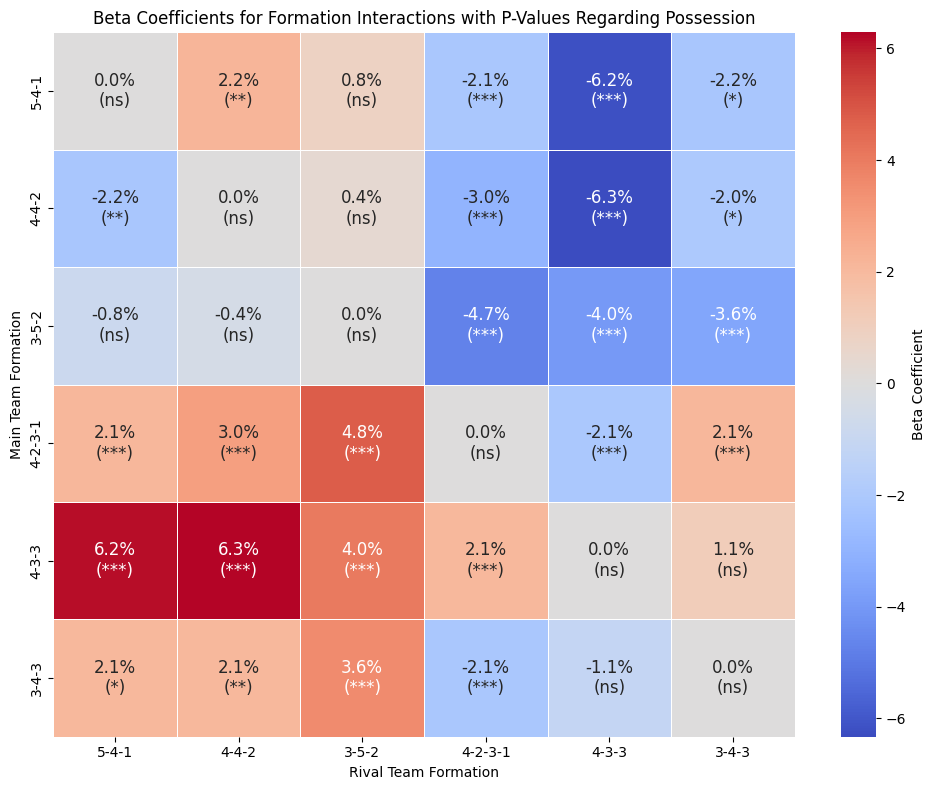

In [89]:
def create_beta_matrix(betas, sorted_formations):
    """
    Creates a matrix of beta coefficients from a list, where rows and columns
    represent main and rival team formations.

    Args:
        betas (list-like): List of beta coefficients (excluding the intercept).
        sorted_formations (list): List of formation labels, sorted.

    Returns:
        pd.DataFrame: A DataFrame representing the beta matrix with formations
                      as index and columns. The last cell is set to NaN for
                      better visualization.
    """
    n = len(sorted_formations)
    beta_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == n - 1 and j == n - 1:  # Last formation
                beta_matrix[i, j] = np.nan  # Use NaN for the last cell
            else:
                # beta_matrix[i, j] = betas[i * n + j + 1]  # +1 to skip intercept
                beta_matrix[i, j] = betas[i * n + j]  # NO INTERCEPT

                

    beta_df = pd.DataFrame(beta_matrix, index=sorted_formations, columns=sorted_formations)
    beta_df.index.name = "main_team_formation"
    beta_df.columns.name = "rival_team_formation"
    return beta_df


beta_df = create_beta_matrix(betas, sorted_formations)
beta_df.iloc[-1, -1] = -betas.sum()
beta_df = beta_df.applymap(lambda x: 0 if pd.notna(x) and abs(x) < 1e-1 else x)

# Visualize the beta matrix using seaborn heatmap with p-values
plt.figure(figsize=(10, 8))

# Create a new DataFrame for annotations with coefficients and p-values
annotations = beta_df.copy()
for i, row in enumerate(beta_df.index):
    for j, col in enumerate(beta_df.columns):
        if not pd.isna(beta_df.loc[row, col]):
            beta_key = f"beta{i * len(beta_df.columns) + j + 1}"  # Construct the beta key
            if beta_key in pvalue_dict:
                pvalue_annotation = pvalue_dict[beta_key][1]  # Get the significance level (e.g., "***")
                annotations.loc[row, col] = f"{beta_df.loc[row, col]:.1f}%\n({pvalue_annotation})"
            else:
                annotations.loc[row, col] = f"{beta_df.loc[row, col]:.1f}%"

sns.heatmap(beta_df, annot=annotations, fmt="", cmap='coolwarm', linewidths=.6, cbar_kws={'label': 'Beta Coefficient'},annot_kws={"size": 12})
# plt.title("Beta Coefficients for Formation Interactions with P-Values Regarding Possession (Home vs Away)")
# plt.ylabel("Home Team Formation")
# plt.xlabel("Away Team Formation")
plt.title("Beta Coefficients for Formation Interactions with P-Values Regarding Possession")
plt.ylabel("Main Team Formation")
plt.xlabel("Rival Team Formation")
plt.tight_layout()
plt.show()


In [45]:
betas

x1     0.030675
x2    -2.162143
x3    -0.841651
x4     2.110328
x5     6.217284
x6     2.152957
x7     2.162543
x8     0.003861
x9    -0.408873
x10    2.984738
x11    6.329154
x12    2.030999
x13    0.810405
x14    0.432141
x15    0.023099
x16    4.729206
x17    3.999910
x18    3.550522
x19   -2.119637
x20   -2.964581
x21   -4.780011
x22    0.001249
x23    2.065789
x24   -2.133182
x25   -6.182701
x26   -6.287757
x27   -4.021172
x28   -2.093368
x29   -0.007470
x30   -1.126280
x31   -2.097911
x32   -2.062893
x33   -3.559333
x34    2.135922
x35    1.115177
dtype: float64

In [31]:
betas.sum()

-0.018597199716714884

c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

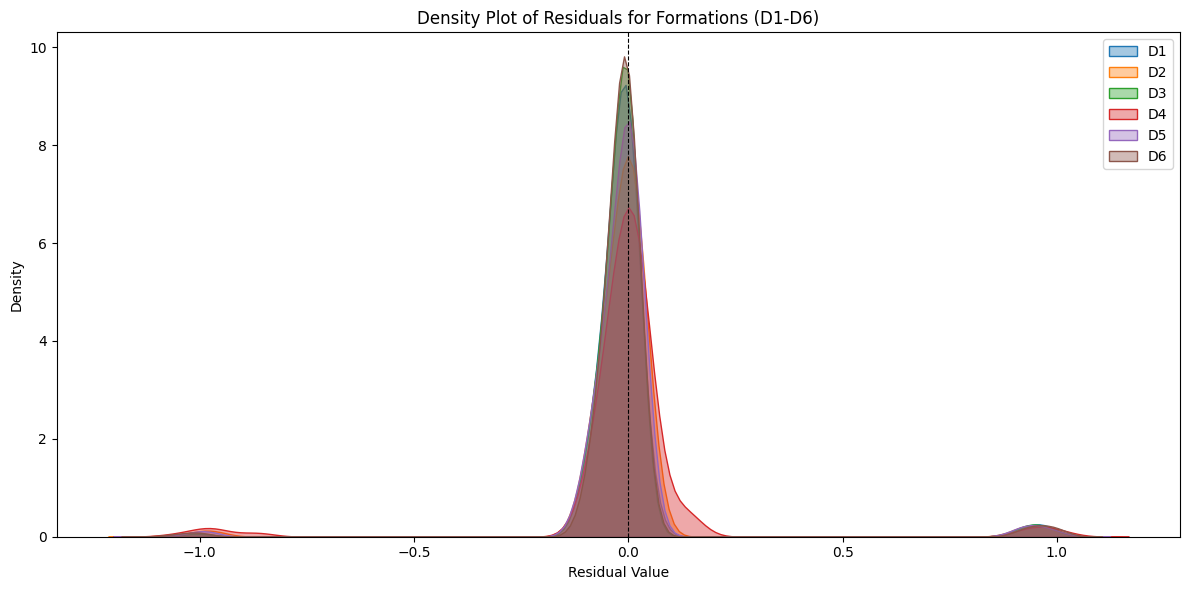

In [51]:
# Density plot of the residuals for each formation (D1 to D6)
plt.figure(figsize=(12, 6))
for i in range(1, 7):
    sns.kdeplot(list_of_residuals2_test[f"D{i}"], label=f"D{i}", fill=True, alpha=0.4)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Density Plot of Residuals for Formations (D1-D6)")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


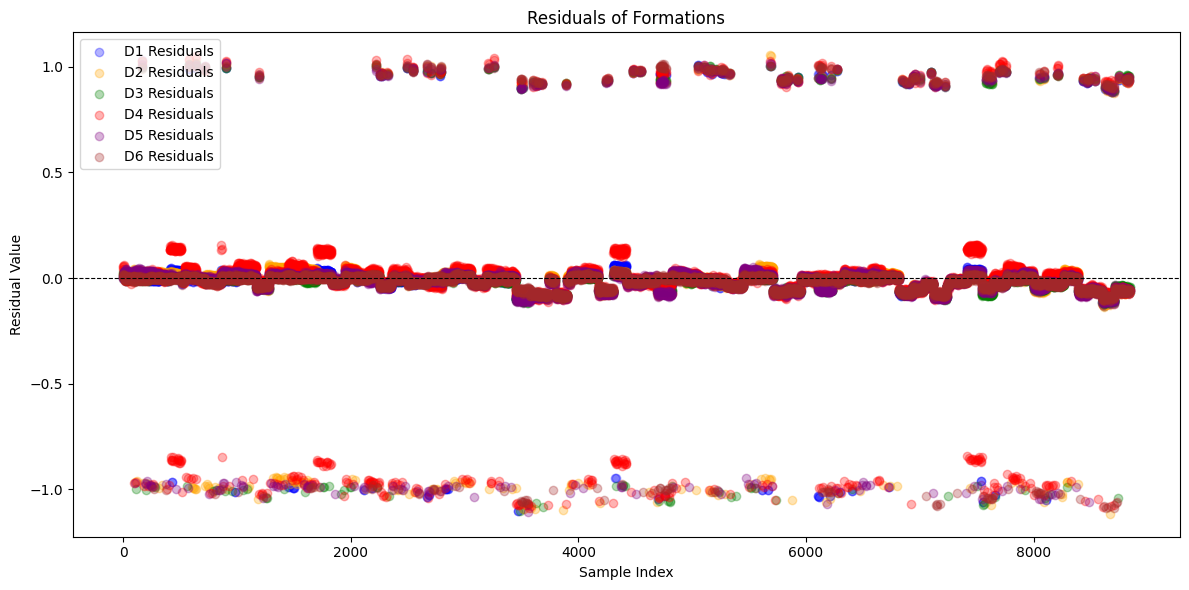

In [53]:
plt.figure(figsize=(12, 6))
# plt.plot(list_of_residuals2_test["D1"], label="D1", alpha=0.7)
# plt.plot(list_of_residuals2_test["D2"], label="D2", alpha=0.7)
# plt.plot(list_of_residuals2_test["D3"], label="D3", alpha=0.7)
# plt.plot(list_of_residuals2_test["D4"], label="D4", alpha=0.7)
# plt.plot(list_of_residuals2_test["D5"], label="D5", alpha=0.7)
# plt.plot(list_of_residuals2_test["D6"], label="D6", alpha=0.7)
plt.scatter(range(len(list_of_residuals2_test["D1"])), list_of_residuals2_test["D1"], alpha=0.3, color='blue', label='D1 Residuals')
plt.scatter(range(len(list_of_residuals2_test["D2"])), list_of_residuals2_test["D2"], alpha=0.3, color='orange', label='D2 Residuals')
plt.scatter(range(len(list_of_residuals2_test["D3"])), list_of_residuals2_test["D3"], alpha=0.3, color='green', label='D3 Residuals')
plt.scatter(range(len(list_of_residuals2_test["D4"])), list_of_residuals2_test["D4"], alpha=0.3, color='red', label='D4 Residuals')
plt.scatter(range(len(list_of_residuals2_test["D5"])), list_of_residuals2_test["D5"], alpha=0.3, color='purple', label='D5 Residuals')
plt.scatter(range(len(list_of_residuals2_test["D6"])), list_of_residuals2_test["D6"], alpha=0.3, color='brown', label='D6 Residuals')


plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Residuals of Formations")
plt.xlabel("Sample Index")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
#For each main formation (1-6, 7-12, 13-18, 19-24, 25-30, 31-36), count the residuals that are 1, -1 or 0 and return a table
def count_residuals(residuals_dict, n):
    counts = {f"D{i+1}": [0, 0, 0] for i in range(n)}  # Initialize counts for each formation

    for i in range(n):
        residuals = residuals_dict[f"D{i+1}"]
        # Approximate residuals to -1, 0, or 1
        approx_residuals = np.where(residuals > 0.5, 1, np.where(residuals < -0.5, -1, 0))
        counts[f"D{i+1}"][0] = np.sum(approx_residuals == 1)   # Count of 1
        counts[f"D{i+1}"][1] = np.sum(approx_residuals == -1)  # Count of -1
        counts[f"D{i+1}"][2] = np.sum(approx_residuals == 0)   # Count of 0

    return pd.DataFrame(counts, index=["Count_1", "Count_-1", "Count_0"]).T
n=36
# Count residuals for the test set
residuals_counts_test = count_residuals(list_of_residuals2_test, n-1)
# Count residuals for the train set
residuals_counts_train = count_residuals(list_of_residuals2_train, n-1)
# Display the counts
print("Residuals Counts (Test Set):")
print(residuals_counts_test)
print("\nResiduals Counts (Train Set):")
print(residuals_counts_train)


Residuals Counts (Test Set):
     Count_1  Count_-1  Count_0
D1       242        56     8548
D2       242       126     8478
D3       242        55     8549
D4       242       270     8334
D5       242        96     8508
D6       242        82     8522
D7       242       126     8478
D8       242       344     8260
D9       242       152     8452
D10      242       372     8232
D11      242       264     8340
D12      242       133     8471
D13      242        55     8549
D14      242       152     8452
D15      242       288     8316
D16      242       296     8308
D17      242       304     8300
D18      242       192     8412
D19      242       270     8334
D20      242       372     8232
D21      242       296     8308
D22      242       918     7686
D23      242       487     8117
D24      242       286     8318
D25      242        96     8508
D26      242       264     8340
D27      242       304     8300
D28      242       487     8117
D29      276       374     8196
D30      24

In [64]:
#groub by D1-D6, D7-D12, D13-D18, D19-D24, D25-D30, D31-D36 and sum the counts 
#sorted_formations = ["5-4-1","4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"]
def group_residuals_counts(residuals_counts, n):
    grouped_counts = {}
    for i in range(0, n, 6):  # Group by sets of 6
        group_name = f"D{i+1}-{i+6}"
        grouped_counts[group_name] = residuals_counts.iloc[i:i+6].sum()
    return pd.DataFrame(grouped_counts).T

# Group the counts for the test set
grouped_counts_test = group_residuals_counts(residuals_counts_test, n-1)
# Group the counts for the train set
grouped_counts_train = group_residuals_counts(residuals_counts_train, n-1)

def to_percentages(df):
    return df.div(df.sum(axis=1), axis=0) * 100

# Add the column of sorted formations so D1-6 corresponds to 5-4-1, D7-12 to 4-4-2, etc.
def add_formation_column(grouped_counts, sorted_formations):
    n_groups = grouped_counts.shape[0]
    # Each group corresponds to one formation in sorted_formations
    grouped_counts = grouped_counts.copy()
    grouped_counts["Formation"] = sorted_formations[:n_groups]
    # Move Formation column to the front
    cols = grouped_counts.columns.tolist()
    grouped_counts = grouped_counts[["Formation"] + [c for c in cols if c != "Formation"]]
    return grouped_counts

grouped_counts_test_with_form = add_formation_column(grouped_counts_test, sorted_formations)
grouped_counts_train_with_form = add_formation_column(grouped_counts_train, sorted_formations)

print("Grouped Residuals Counts (Test Set) [%]:")
print(to_percentages(grouped_counts_test_with_form.drop(columns="Formation")).round(2).assign(Formation=grouped_counts_test_with_form["Formation"]))
print("\nGrouped Residuals Counts (Train Set) [%]:")
print(to_percentages(grouped_counts_train_with_form.drop(columns="Formation")).round(2).assign(Formation=grouped_counts_train_with_form["Formation"]))



Grouped Residuals Counts (Test Set) [%]:
        Count_1  Count_-1  Count_0 Formation
D1-6       2.74      1.29    95.97     5-4-1
D7-12      2.74      2.62    94.64     4-4-2
D13-18     2.74      2.42    94.84     3-5-2
D19-24     2.74      4.95    92.31   4-2-3-1
D25-30     2.80      3.19    94.01     4-3-3
D31-36     2.74      1.95    95.32     3-4-3

Grouped Residuals Counts (Train Set) [%]:
        Count_1  Count_-1  Count_0 Formation
D1-6       2.64      1.26    96.10     5-4-1
D7-12      2.64      2.60    94.76     4-4-2
D13-18     2.64      2.51    94.85     3-5-2
D19-24     2.64      4.89    92.47   4-2-3-1
D25-30     2.73      3.21    94.06     4-3-3
D31-36     2.64      1.97    95.39     3-4-3


In [75]:

list_type_residuals2_test = {k: v.tolist() for k, v in list_of_residuals2_test.items()}
list_type_residuals2_test

{'D1': [-0.0017640440841979362,
  -0.001764044084197846,
  0.011222755595611287,
  0.011222755595611252,
  -0.0026745833601873395,
  -0.002674583360187336,
  0.012578884393193483,
  0.012578884393193476,
  0.005710160978689989,
  0.0057101609786899925,
  0.010379252705604674,
  0.010379252705604702,
  -0.009042533919328894,
  -0.009042533919328823,
  0.0012994408230283631,
  0.0012994408230283978,
  -0.006257309518839601,
  -0.006257309518839639,
  0.0022618374042384926,
  0.0022618374042384405,
  -0.0010112845376639458,
  -0.0010112845376639562,
  -0.014243003343559674,
  -0.01424300334355964,
  -0.002063246868628632,
  -0.002063246868628764,
  0.003063145184435793,
  0.0030631451844358275,
  -0.0024906598991396994,
  -0.002490659899139578,
  0.0006448077836246693,
  0.0006448077836246277,
  0.002296135461073493,
  0.002296135461073455,
  0.008077196721739038,
  0.008077196721739007,
  0.0020324959749890813,
  0.00203249597498905,
  0.0011774452692923584,
  0.0011774452692923862,
  -0

0.8993294673245552
0.895213055703354


In [76]:
df_data.columns

Index(['fixture_id', 'League', 'season', 'season_id', 'round', 'date', 'month',
       'day_of_week', 'side', 'main_team', 'rival_team', 'winner',
       'goals_diff', 'main_team_formation', 'rival_team_formation',
       'main_team_lineup', 'rival_team_lineup', 'main_team_bench',
       'rival_team_bench', 'main_team_acc_possession',
       'rival_team_acc_possession', 'main_team_acc_goals',
       'rival_team_acc_goals', 'main_team_acc_corners',
       'rival_team_acc_corners', 'main_team_acc_yellow_cards',
       'rival_team_acc_yellow_cards', 'main_team_acc_red_cards',
       'rival_team_acc_red_cards', 'main_team_acc_pointsL',
       'main_team_acc_pointsA', 'main_team_acc_points',
       'rival_team_acc_pointsL', 'rival_team_acc_pointsA',
       'rival_team_acc_points', 'main_team_plays_CL', 'rival_team_plays_CL',
       'main_team_rk', 'rival_team_rk', 'participants', 'statistics', 'events',
       'clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed',
       'possessi

In [78]:
X_train.describe()

,round,side,main_team_acc_pointsL,main_team_acc_pointsA,rival_team_acc_pointsL,rival_team_acc_pointsA,main_team_plays_CL,rival_team_plays_CL,main_team_rk,rival_team_rk,...,season_id_23744.0,season_id_23746.0,season_id_23793.0,season_id_23839.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
count,3.538200e+04,35382.000000,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,...,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04,3.538200e+04
mean,-1.574432e-16,0.000000,9.438559e-17,-3.707145e-16,9.438559e-17,-3.707145e-16,3.213126e-18,3.213126e-18,-1.253119e-16,-1.253119e-16,...,-2.570501e-17,5.141002e-17,-1.285251e-17,3.855752e-17,1.004102e-16,-9.478723e-17,5.502479e-17,8.444498e-17,-7.109042e-17,-7.229534e-17
std,1.000014e+00,1.000014,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.676339e+00,-1.000000,-2.264394e+00,-1.783604e+00,-2.264394e+00,-1.783604e+00,-2.212376e-01,-2.212376e-01,-1.555442e+00,-1.555442e+00,...,-1.137549e-01,-1.214138e-01,-1.114381e-01,-1.177667e-01,-2.173442e-01,-2.598529e-01,-1.479606e-01,-3.037092e-01,-8.156891e-01,-7.014485e-01
25%,-9.015684e-01,-1.000000,-6.780024e-01,-6.808430e-01,-6.780024e-01,-6.808430e-01,-2.212376e-01,-2.212376e-01,-8.417443e-01,-8.417443e-01,...,-1.137549e-01,-1.214138e-01,-1.114381e-01,-1.177667e-01,-2.173442e-01,-2.598529e-01,-1.479606e-01,-3.037092e-01,-8.156891e-01,-7.014485e-01
50%,-1.611642e-02,0.000000,-6.785189e-02,-1.156780e-01,-6.785189e-02,-1.156780e-01,-2.212376e-01,-2.212376e-01,-1.280468e-01,-1.280468e-01,...,-1.137549e-01,-1.214138e-01,-1.114381e-01,-1.177667e-01,-2.173442e-01,-2.598529e-01,-1.479606e-01,-3.037092e-01,-8.156891e-01,-7.014485e-01
75%,8.693355e-01,1.000000,6.643288e-01,5.413837e-01,6.643288e-01,5.413837e-01,-2.212376e-01,-2.212376e-01,8.235498e-01,8.235498e-01,...,-1.137549e-01,-1.214138e-01,-1.114381e-01,-1.177667e-01,-2.173442e-01,-2.598529e-01,-1.479606e-01,-3.037092e-01,1.225957e+00,1.425621e+00
max,1.754787e+00,1.000000,2.128690e+00,2.765285e+00,2.128690e+00,2.765285e+00,4.520027e+00,4.520027e+00,2.964642e+00,2.964642e+00,...,8.790834e+00,8.236296e+00,8.973592e+00,8.491367e+00,4.600997e+00,3.848331e+00,6.758558e+00,3.292623e+00,1.225957e+00,1.425621e+00


In [79]:
df_data.describe()

,fixture_id,season_id,round,month,day_of_week,winner,goals_diff,main_team_acc_possession,rival_team_acc_possession,main_team_acc_goals,...,main_team_plays_CL,rival_team_plays_CL,main_team_rk,rival_team_rk,clouds,feels_like,humidity,temperature,wind_speed,possession_diff
count,4.422800e+04,44228.000000,44228.000000,44228.000000,44228.000000,44228.000000,44228.000000,44228.000000,44228.000000,44228.000000,...,44228.000000,44228.000000,44228.000000,44228.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,44228.000000
mean,1.677113e+07,19045.679750,18.137017,5.490006,5.552455,0.000000,0.000000,49.954664,49.954664,1.344393,...,0.046645,0.046645,7.524577,7.524577,61.829958,13.373042,64.966098,14.621969,5.298474,0.000000
std,3.081332e+06,3125.528656,9.041291,2.554954,1.729610,0.855779,1.771795,6.745734,6.745734,0.579386,...,0.210879,0.210879,4.201373,4.201373,37.271454,20.760608,18.142595,20.318299,2.728610,21.923236
min,1.033021e+07,12935.000000,3.000000,1.000000,1.000000,-1.000000,-13.000000,18.000000,18.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,-43.240000,1.000000,-36.240000,0.360000,-72.000000
25%,1.672518e+07,17287.000000,10.000000,3.000000,5.000000,-1.000000,-1.000000,45.343694,45.343694,0.998769,...,0.000000,0.000000,4.000000,4.000000,25.000000,6.130000,52.000000,8.270000,3.200000,-16.000000
50%,1.821919e+07,18576.000000,18.000000,5.000000,6.000000,0.000000,0.000000,49.296246,49.296246,1.248272,...,0.000000,0.000000,7.000000,7.000000,74.000000,12.140000,66.000000,12.970000,4.820000,0.000000
75%,1.885426e+07,21730.000000,26.000000,7.000000,7.000000,1.000000,1.000000,54.105634,54.105634,1.622617,...,0.000000,0.000000,11.000000,11.000000,99.000000,17.930000,79.000000,18.310000,6.760000,16.000000
max,1.916799e+07,23839.000000,34.000000,12.000000,7.000000,1.000000,13.000000,82.000000,82.000000,8.000000,...,1.000000,1.000000,20.000000,20.000000,100.000000,304.400000,100.000000,306.660000,20.120000,72.000000


In [82]:
D_train.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
count,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,...,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000
mean,-0.019219,-0.012520,-0.019699,0.001102,-0.015205,-0.017212,-0.012520,0.010231,-0.009638,0.018230,...,0.005737,0.025521,0.028376,-0.006783,-0.017212,-0.012351,-0.003533,0.006274,-0.006783,-0.026398
std,0.182231,0.200297,0.180856,0.232159,0.193286,0.187850,0.200297,0.250846,0.207523,0.265884,...,0.241870,0.278689,0.283493,0.214400,0.187850,0.200731,0.221926,0.242965,0.214400,0.160317
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
